# 🏆 **Round 2 Showdown: AVGX vs. NRO**

The competition heats up as we move into **Round 2** of **StockBowl**! In this matchup, **AVGX** and **NRO** go head-to-head to determine which stock will advance to the **final round**. 

This analysis will focus on key financial metrics, including:
- 📈 **Trend Stability & Consistency** – Does the stock show a smooth, predictable trend, or is it prone to erratic swings?
- 💧 **Liquidity** – How easily can the stock be traded without significant price slippage?
- ⚖️ **Volatility** – Which stock offers a more stable return with controlled risk?
- 📊 **Rolling Volatility & Market Correlation** – How do these stocks behave over time compared to the broader market?

After a detailed comparison, we will declare a **winner** who will move forward to the **FINAL ROUND!** 🚀

In [6]:
# Import necessary libraries
import pandas as pd
import json

In [7]:
# Load the JSON file
with open("./Stock_data/all_stock_data.json", "r") as file:
    raw_data = json.load(file)

In [8]:
# Convert JSON to a Pandas DataFrame
df = pd.json_normalize(raw_data)

In [9]:
# Filter for AVGX and NRO
filtered_df = df[df["symbol"].isin(["AVGX", "NRO"])]

In [10]:
# Rename columns to match the required format
filtered_df = filtered_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Close",
    "5. volume": "Volume",
    "date": "Date",
    "symbol": "Symbol"
})

In [11]:
# Select only the relevant columns
filtered_df = filtered_df[["Open", "High", "Low", "Close", "Volume", "Date", "Symbol"]]

In [12]:
# Convert to JSON and save
output_file = "./Stock_data/avgx_nro_cleaned.json"
filtered_df.to_json(output_file, orient="records", indent=4)

In [13]:
# Define the file path to the JSON data
file_path = './Stock_data/avgx_nro_cleaned.json'

In [14]:
# Open and load the JSON file into a Python dictionary
with open(file_path, 'r') as json_file:
    stock_data = json.load(json_file)  # Load JSON data

In [15]:
# Convert the JSON data into a Pandas DataFrame
avgx_nro_df = pd.DataFrame(stock_data)

In [16]:
# Separate the data into two DataFrames: one for NVDA and one for DWTX
avgx_df = avgx_nro_df[avgx_nro_df['Symbol'] == 'AVGX'].copy()
nro_df = avgx_nro_df[avgx_nro_df['Symbol'] == 'NRO'].copy()

In [17]:
# Sort both DataFrames by date to ensure chronological order
avgx_df = avgx_df.sort_values(by='Date')
nro_df = nro_df.sort_values(by='Date')

In [18]:
# Display the first few rows of each DataFrame to verify the data separation
print("AVGX Data:")
print(avgx_df.head()) 

print("\nNRO Data:")
print(nro_df.head())

AVGX Data:
        Open     High      Low    Close Volume        Date Symbol
110  21.2000  21.2000  19.1800  19.2300  22337  2024-08-22   AVGX
109  19.6600  20.5400  19.3700  20.0393  36319  2024-08-23   AVGX
108  19.9300  19.9300  18.2500  18.3776  59147  2024-08-26   AVGX
107  18.0000  18.9400  17.7614  18.8300  19404  2024-08-27   AVGX
106  18.8306  18.8306  17.7200  18.1013  29454  2024-08-28   AVGX

NRO Data:
         Open     High      Low    Close  Volume        Date Symbol
5459  15.0000  15.0000  14.9500  15.0000  486600  2003-10-29    NRO
5458  15.0000  15.0100  15.0000  15.0100   54400  2003-10-30    NRO
5457  15.0100  15.0100  15.0000  15.0100   51800  2003-10-31    NRO
5456  15.0000  15.0100  15.0000  15.0000   27200  2003-11-03    NRO
5455  15.0100  15.0100  15.0000  15.0100   57000  2003-11-04    NRO


In [19]:
# Ensure 'Date' is in datetime format
avgx_df['Date'] = pd.to_datetime(avgx_df['Date'])
nro_df['Date'] = pd.to_datetime(nro_df['Date'])

In [20]:
# Set 'Date' as index only if it's not already
if 'Date' in avgx_df.columns:
    avgx_df.set_index('Date', inplace=True)
if 'Date' in nro_df.columns:
    nro_df.set_index('Date', inplace=True)

In [21]:
# Select only required columns (OHLC + Volume)
avgx_ohlc = avgx_df[['Open', 'High', 'Low', 'Close', 'Volume']]
nro_ohlc = nro_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [22]:
# Convert OHLC and Volume columns to numeric (float type)
avgx_ohlc = avgx_ohlc.astype({'Open': 'float', 'High': 'float',
                               'Low': 'float', 'Close': 'float',
                               'Volume': 'float'})

nro_ohlc = nro_ohlc.astype({'Open': 'float', 'High': 'float',
                             'Low': 'float', 'Close': 'float',
                             'Volume': 'float'})

In [23]:
# Display data types to verify
print(avgx_ohlc.dtypes)
print(nro_ohlc.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [24]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

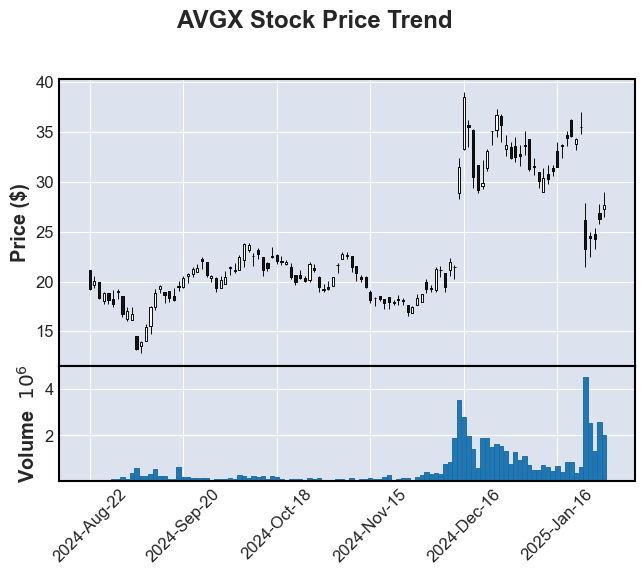

In [25]:
# Plot candlestick chart on a year level
mpf.plot(avgx_ohlc, type='candle', volume=True, title="AVGX Stock Price Trend", ylabel="Price ($)")
mpf.show()


In [26]:
# Generate separate candlestick plots for each quarter of AVGX
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [27]:
# Convert Date index to datetime format (if not already converted)
avgx_ohlc.index = pd.to_datetime(avgx_ohlc.index)

In [28]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """
    
    # Filter the data for the given year and months
    quarter_data = avgx_ohlc[(avgx_ohlc.index.year == year) & (avgx_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January)
    if extra_year and extra_months:
        extra_data = avgx_ohlc[(avgx_ohlc.index.year == extra_year) & (avgx_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
        title=f"AVGX Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style='yahoo',  # Fix: Use a valid mplfinance style
        mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
        figsize=(10, 6),
        tight_layout=True,
        returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

No data for Q1 (Jan-Mar 2024)
No data for Q2 (Apr-Jun 2024)


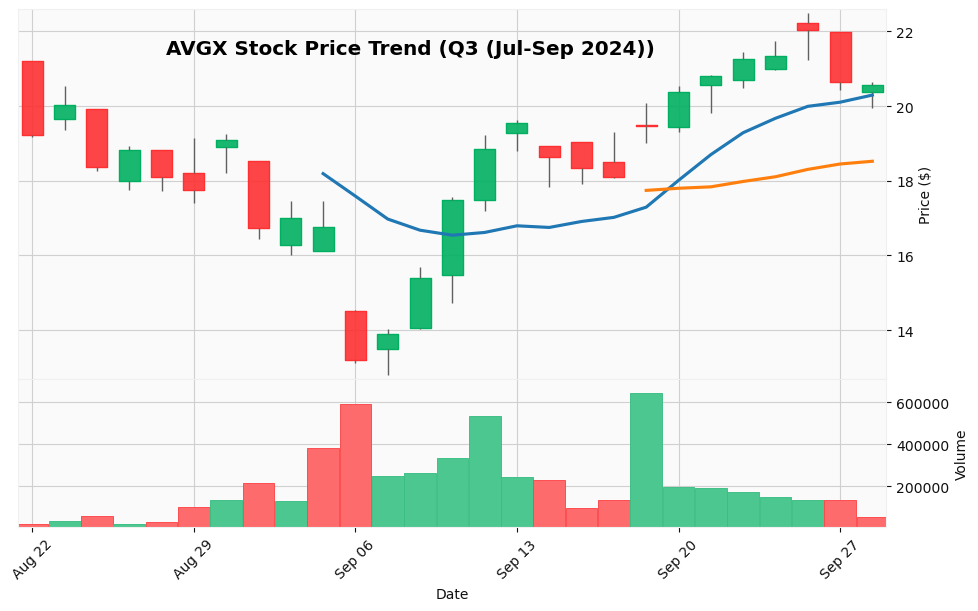

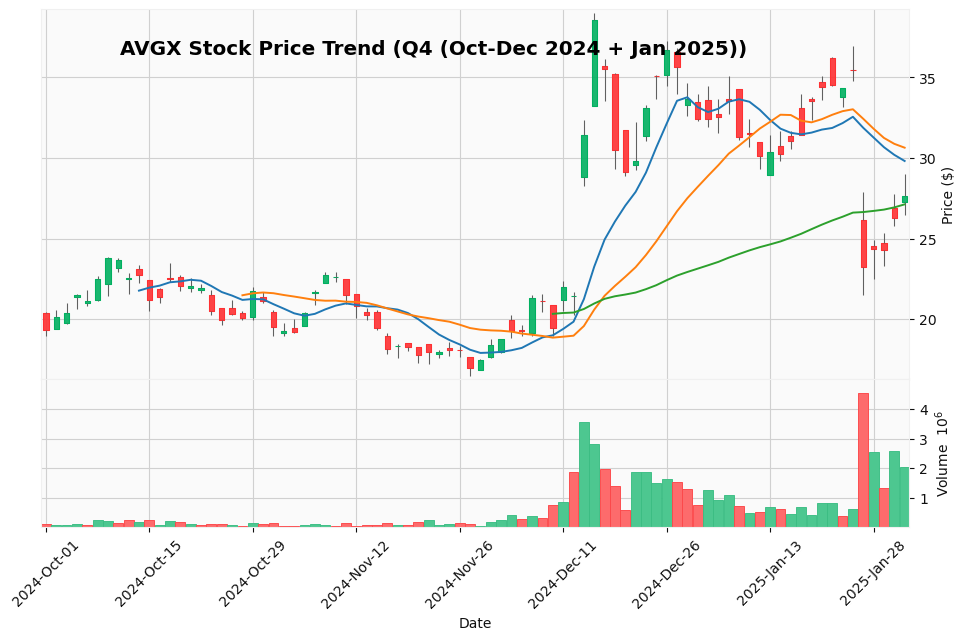

In [29]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

c:\Users\cindy\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


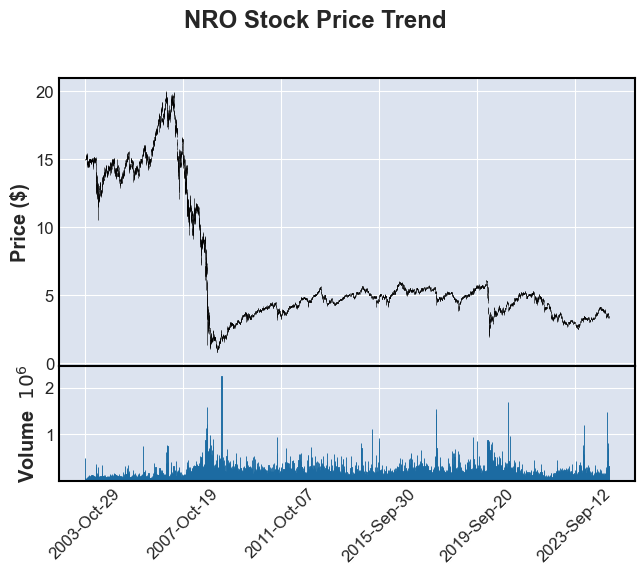

In [30]:
# Plot candlestick chart on a year level
mpf.plot(nro_ohlc, type='candle', volume=True, title="NRO Stock Price Trend", ylabel="Price ($)")
mpf.show()

In [31]:
# Generate separate candlestick plots for each quarter of DWTX
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [32]:
# Convert Date index to datetime format (if not already converted)
nro_ohlc.index = pd.to_datetime(nro_ohlc.index)

In [33]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """
    
    # Filter the data for the given year and months
    quarter_data_2 = nro_ohlc[(nro_ohlc.index.year == year) & (nro_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January)
    if extra_year and extra_months:
        extra_data = nro_ohlc[(nro_ohlc.index.year == extra_year) & (nro_ohlc.index.month.isin(extra_months))]
        quarter_data_2 = pd.concat([quarter_data_2, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data_2.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data_2, type='candle', volume=True,
        title=f"NRO Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style='yahoo',  # Fix: Use a valid mplfinance style
        mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
        figsize=(10, 6),
        tight_layout=True,
        returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

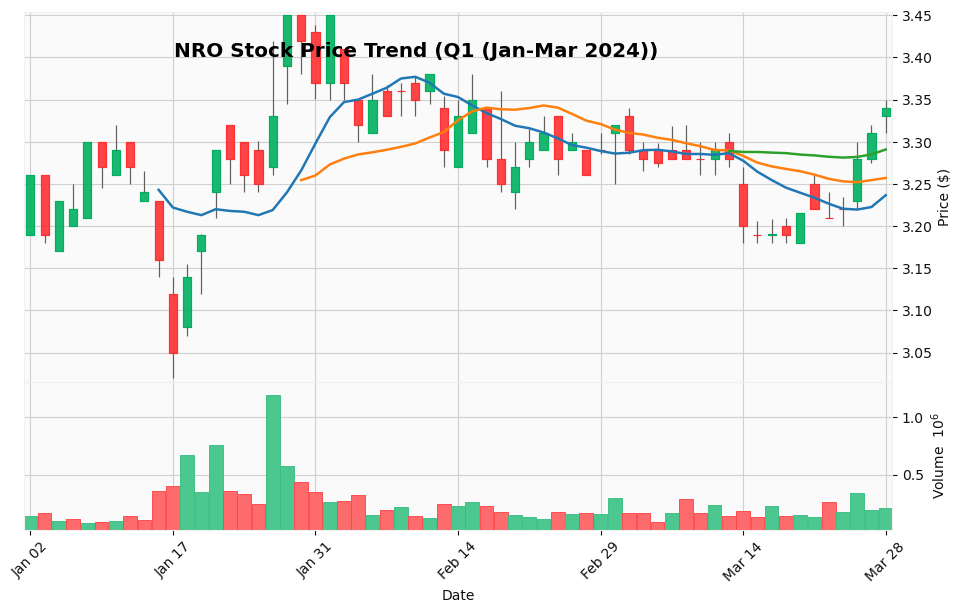

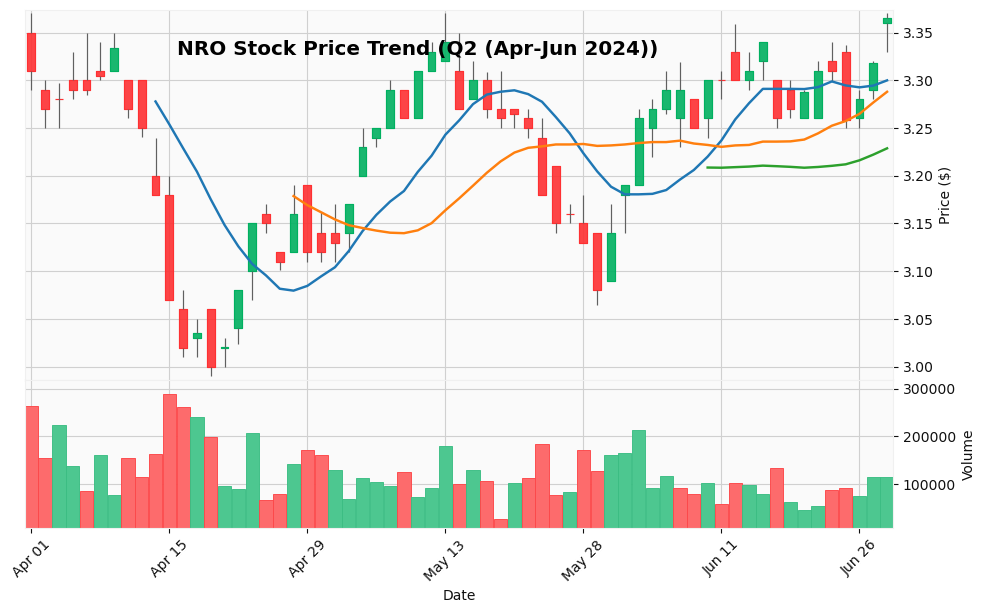

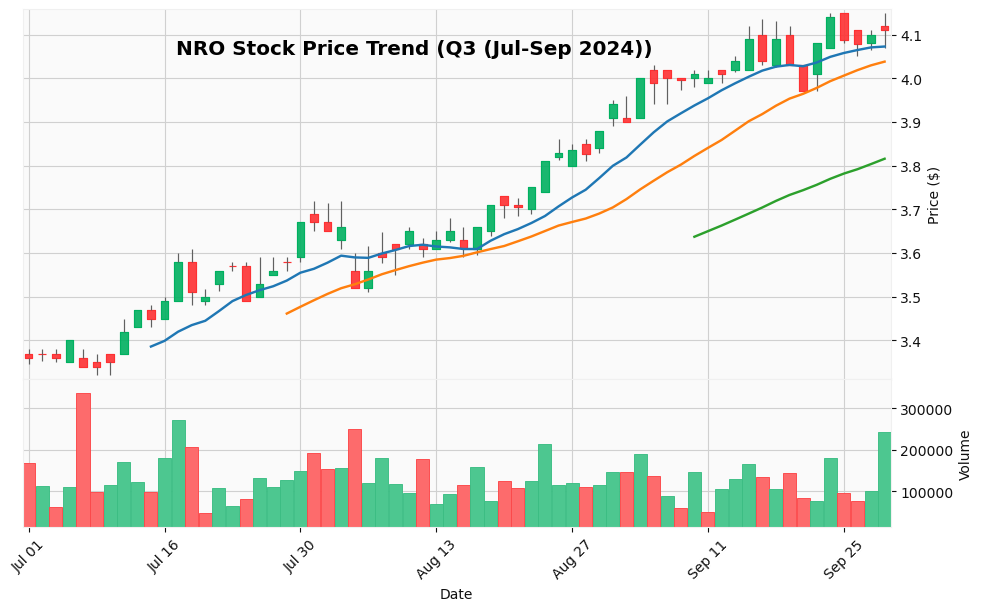

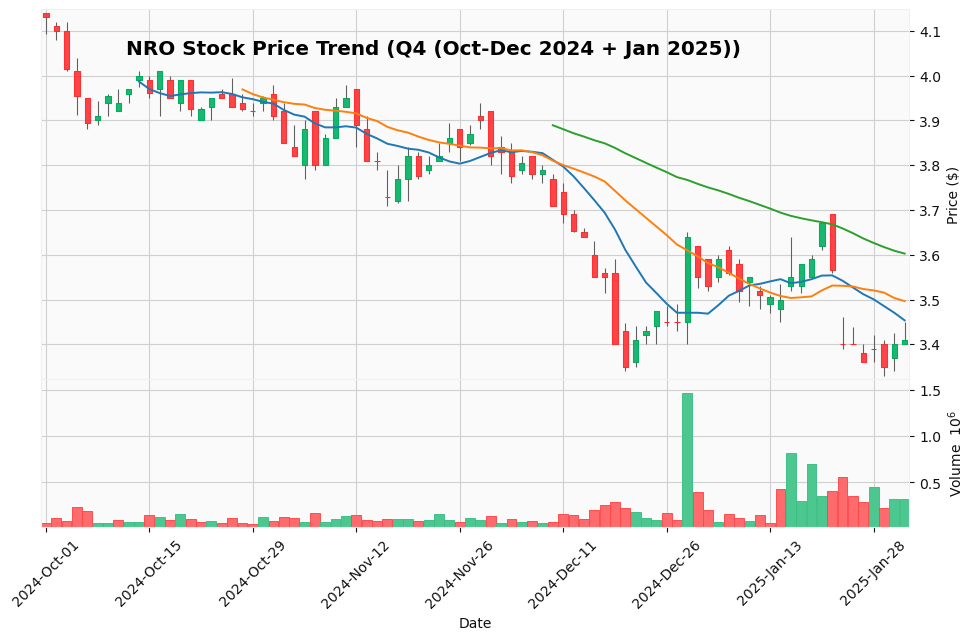

In [34]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

# Trend & Stability:
- **AVGX** showed a strong **reversal and uptrend** starting in mid-December, with sustained bullish movement into January.
- **NRO** exhibited a **consistent downtrend** throughout Q4, with lower highs and lower lows, reflecting weak price stability.

# Liquidity (Volume):
- **AVGX** had **steady trading volume**, with noticeable increases during its upward price movement.
- **NRO** displayed **lower and inconsistent volume**, with occasional spikes, indicating weaker liquidity.

# Momentum & Moving Averages:
- **AVGX** successfully **broke above** key moving averages and sustained its upward trajectory.
- **NRO** remained **below** its moving averages, failing to regain upward momentum.

# Final Verdict:
✅ **AVGX wins this round** based on **trend strength, liquidity, and momentum**.  
While **NRO's decline may offer value opportunities**, its prolonged downtrend and lack of sustained momentum make **AVGX the stronger pick** for this round.

---

## **Volatility and Risk Analysis**

In [35]:
# Filter data to start from October 1, 2024 (adjust as needed)
start_date = "2024-10-01"
end_date = "2025-01-31"
avgx_filtered = avgx_ohlc.loc[start_date:].copy()
nro_filtered = nro_ohlc.loc[start_date:].copy()

In [36]:
# Compute daily returns
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()
nro_filtered['Daily Return'] = nro_filtered['Close'].pct_change()

In [37]:
# Calculate standard deviation of returns (volatility)
avgx_volatility = avgx_filtered['Daily Return'].std()
nro_volatility = nro_filtered['Daily Return'].std()

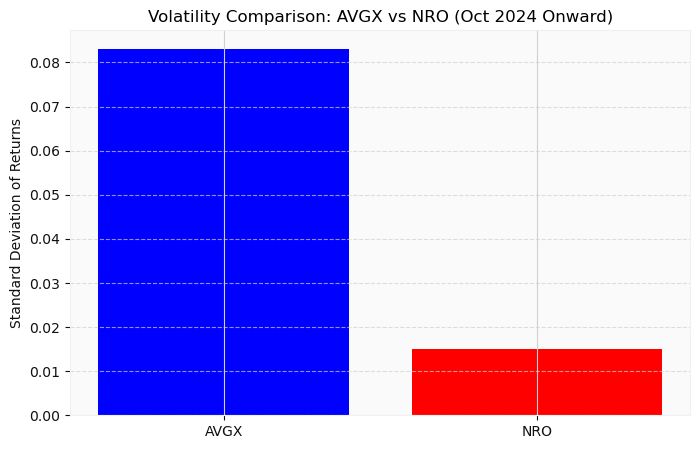

In [38]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['AVGX', 'NRO'], [avgx_volatility, nro_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: AVGX vs NRO (Oct 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# Set the start date for filtering
start_date = "2024-10-01"
end_date = "2025-01-28"

# Filter data and create copies
avgx_filtered = avgx_ohlc.loc[start_date:].copy()
nro_filtered = nro_ohlc.loc[start_date:].copy()

In [40]:
# Compute daily returns
avgx_filtered['Daily Return'] = avgx_filtered['Close'].pct_change()
nro_filtered['Daily Return'] = nro_filtered['Close'].pct_change()

In [41]:
# Compute rolling standard deviation (volatility)
avgx_filtered['Rolling Volatility'] = avgx_filtered['Daily Return'].rolling(window=30).std()
nro_filtered['Rolling Volatility'] = nro_filtered['Daily Return'].rolling(window=30).std()

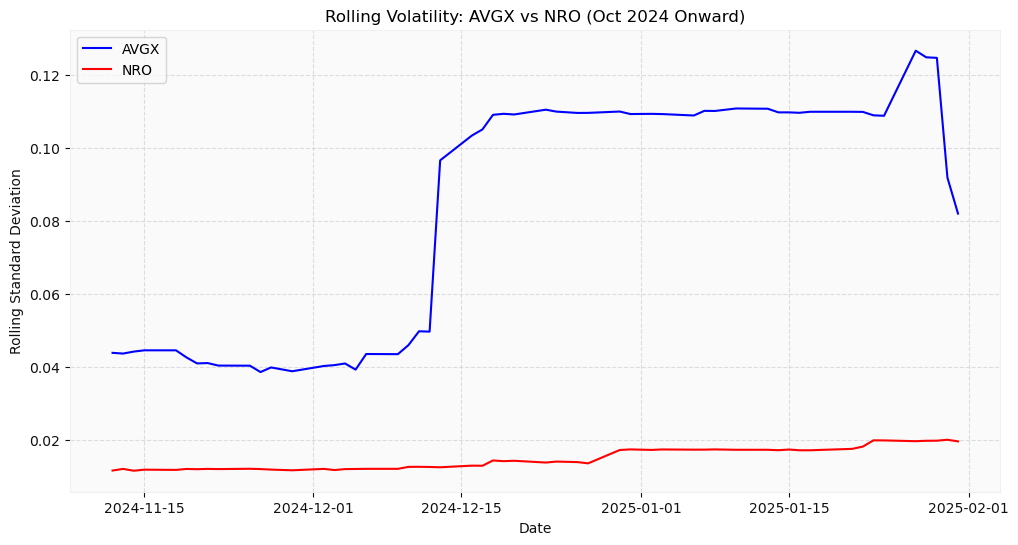

In [42]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(avgx_filtered.index, avgx_filtered['Rolling Volatility'], label='AVGX', color='blue')
plt.plot(nro_filtered.index, nro_filtered['Rolling Volatility'], label='NRO', color='red')

# Formatting the plot
plt.title('Rolling Volatility: AVGX vs NRO (Oct 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

For this round, we are comparing **AVGX vs. NRO** based on **volatility, trend consistency, and liquidity** to determine the stronger stock.

## 1. Standard Deviation of Returns (Volatility Bar Chart)
- **AVGX** exhibits significantly **higher volatility (~0.08-0.09)**, leading to greater price fluctuations.
- **NRO** maintains a **much lower standard deviation (~0.01-0.015)**, indicating more stable price movements.

## 2. Rolling Volatility (Trend Over Time)
- **AVGX** experienced sharp **volatility spikes** in late November and December, making its movement less predictable.
- **NRO** had a **low and steady volatility trend**, remaining relatively stable throughout Q4.

## Final Verdict:
✅ **NRO wins this round** based on **lower volatility and greater price stability**.
While **AVGX** demonstrated **strong movement and momentum**, its **high volatility introduces additional risk** for investors. **NRO’s** more controlled fluctuations make it a **safer and more predictable stock** for investment and trading.

In [43]:
# Install Alpha Vantage
# if needed - %pip install alpha_vantage

In [44]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [45]:
# Import the API key securely
# Sorry, I initially meant vantage.. 
from kirsten_api_keys import alpha_advantage_api

In [46]:
# Define the market index symbol (SPY)
symbol = "SPY"

In [47]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [48]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [49]:
# Parse the JSON response from the API
data = r.json()

In [50]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [51]:
# Save the retrieved market index data to a JSON file for further analysis
with open('./Stock_data/market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")# Print the raw API response (JSON format) for verification
print(data)

Market index data saved to market_index_data.json
{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-02-03', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-02-03': {'1. open': '592.6700', '2. high': '600.2900', '3. low': '590.4900', '4. close': '597.7700', '5. volume': '65857248'}, '2025-01-31': {'1. open': '607.5000', '2. high': '609.9600', '3. low': '601.0500', '4. close': '601.8200', '5. volume': '66671471'}, '2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900

In [52]:
# Define the file path for the market index JSON data
file_path = './Stock_data/market_index_data.json'

In [53]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [54]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [55]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [56]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [57]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [58]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [59]:
# Filter the dataset to include only records from August 23, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-10-01']

In [60]:
# Display the filtered DataFrame
print(filtered_market_index_df)

         Date    Open      High      Low  Market Close      Volume
0  2025-02-03  592.67  600.2900  590.490        597.77  65857248.0
1  2025-01-31  607.50  609.9600  601.050        601.82  66671471.0
2  2025-01-30  603.96  606.6000  600.715        605.04  39281255.0
3  2025-01-29  603.72  604.1300  599.220        601.81  37177429.0
4  2025-01-28  600.62  605.3700  597.250        604.52  44433322.0
..        ...     ...       ...      ...           ...         ...
80 2024-10-07  571.30  571.9599  566.630        567.80  49964690.0
81 2024-10-04  572.35  573.3600  568.100        572.98  43005186.0
82 2024-10-03  567.36  569.8025  565.490        567.82  40846466.0
83 2024-10-02  567.71  569.9000  565.270        568.86  38097798.0
84 2024-10-01  573.40  574.0622  566.000        568.62  72668778.0

[85 rows x 6 columns]


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [62]:
# Fetch AVGX data
avgx = yf.download("AVGX", start="2024-10-01")

# Fetch NRO data
nro = yf.download("NRO", start="2024-10-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [63]:
# Calculate daily returns
avgx['Daily Return'] = avgx['Close'].pct_change()
nro['Daily Return'] = nro['Close'].pct_change()

In [64]:
print(avgx[['Close', 'Daily Return']].head())
print(nro[['Close', 'Daily Return']].head())

Price           Close Daily Return
Ticker           AVGX             
Date                              
2024-10-01  19.189463          NaN
2024-10-02  19.953470     0.039814
2024-10-03  20.251135     0.014918
2024-10-04  21.322727     0.052915
2024-10-07  20.945686    -0.017683
Price          Close Daily Return
Ticker           NRO             
Date                             
2024-10-01  3.994841          NaN
2024-10-02  3.965822    -0.007264
2024-10-03  3.878768    -0.021951
2024-10-04  3.830404    -0.012469
2024-10-07  3.772368    -0.015151


In [65]:
# Filter data between October 1, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-10-01') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [66]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [67]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [68]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [69]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [70]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [71]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [72]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [73]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-10-01,573.40,574.0622,566.00,568.62,72668778.0,-0.000422
1970-01-01 00:00:00.000000002,2024-10-02,567.71,569.9000,565.27,568.86,38097798.0,0.001832
1970-01-01 00:00:00.000000003,2024-10-03,567.36,569.8025,565.49,567.82,40846466.0,-0.009006
1970-01-01 00:00:00.000000004,2024-10-04,572.35,573.3600,568.10,572.98,43005186.0,0.009123
1970-01-01 00:00:00.000000005,2024-10-07,571.30,571.9599,566.63,567.80,49964690.0,-0.009369
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000078,2025-01-23,605.80,609.7500,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000079,2025-01-24,609.81,610.7800,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000080,2025-01-27,594.81,599.6900,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000081,2025-01-28,600.62,605.3700,597.25,604.52,44433322.0,0.004503


**NVDA DF CLEANING**

In [74]:
# Flatten the multi-index column names if necessary
avgx.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in avgx.columns]

In [75]:
# Drop unnecessary index columns if they exist
# columns_to_drop = ['level_0', 'index']
# avgx = avgx.drop(columns=[col for col in columns_to_drop if col in avgx.columns])

In [76]:
# Reset index to move Date into a regular column
avgx.reset_index(inplace=True)

In [77]:
# Convert index to datetime format
avgx.index = pd.to_datetime(avgx.index)

In [78]:
# Filter to only keep rows where Date is within the desired range
avgx = avgx[avgx['Date'] <= '2025-01-29']

In [79]:
avgx

,Date,Close_AVGX,High_AVGX,Low_AVGX,Open_AVGX,Volume_AVGX,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,19.189463,20.276932,18.822342,20.221367,117500,NaN
1970-01-01 00:00:00.000000001,2024-10-02,19.953470,20.429734,19.219230,19.219230,107900,0.039814
1970-01-01 00:00:00.000000002,2024-10-03,20.251135,20.866310,19.566505,19.586350,97200,0.014918
1970-01-01 00:00:00.000000003,2024-10-04,21.322727,21.373331,20.499188,21.223505,136000,0.052915
1970-01-01 00:00:00.000000004,2024-10-07,20.945686,21.670004,20.672825,20.846464,107600,-0.017683
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,34.320000,34.360001,33.160000,33.790001,394800,-0.006944
1970-01-01 00:00:00.000000078,2025-01-24,35.459999,36.959999,34.750000,35.490002,645500,0.033217
1970-01-01 00:00:00.000000079,2025-01-27,23.260000,27.889999,21.500000,26.129999,4540100,-0.344050
1970-01-01 00:00:00.000000080,2025-01-28,24.370001,24.943001,22.469999,24.570000,2533300,0.047721


In [80]:
print(avgx.columns)

Index(['Date', 'Close_AVGX', 'High_AVGX', 'Low_AVGX', 'Open_AVGX',
       'Volume_AVGX', 'Daily Return_'],
      dtype='object')


In [81]:
print(avgx.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


In [82]:
# Merge AVGX with Market Index on Date
avgx_merged_data = pd.merge(
    avgx[['Date', 'Daily Return_']].copy(), 
    filtered_market_index_df[['Date', 'Market Return']].copy(),
    on='Date',
    how='inner'
)

In [83]:
# Rename columns for clarity
avgx_merged_data.rename(columns={'Daily Return': 'AVGX Daily Return'}, inplace=True)

In [84]:
# Display first few rows
print(avgx_merged_data.head())

        Date  Daily Return_  Market Return
0 2024-10-01            NaN      -0.000422
1 2024-10-02       0.039814       0.001832
2 2024-10-03       0.014918      -0.009006
3 2024-10-04       0.052915       0.009123
4 2024-10-07      -0.017683      -0.009369


In [85]:
# Compute covariance matrix
cov_matrix = avgx_merged_data[['Daily Return_', 'Market Return']].cov()

# Extract covariance of AKRO vs. Market
cov_avgx_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
avgx_beta = cov_avgx_market / var_market

In [86]:
# Print Beta value
print(f"AVGX Beta: {avgx_beta:.3f}")

AVGX Beta: -0.138


In [87]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

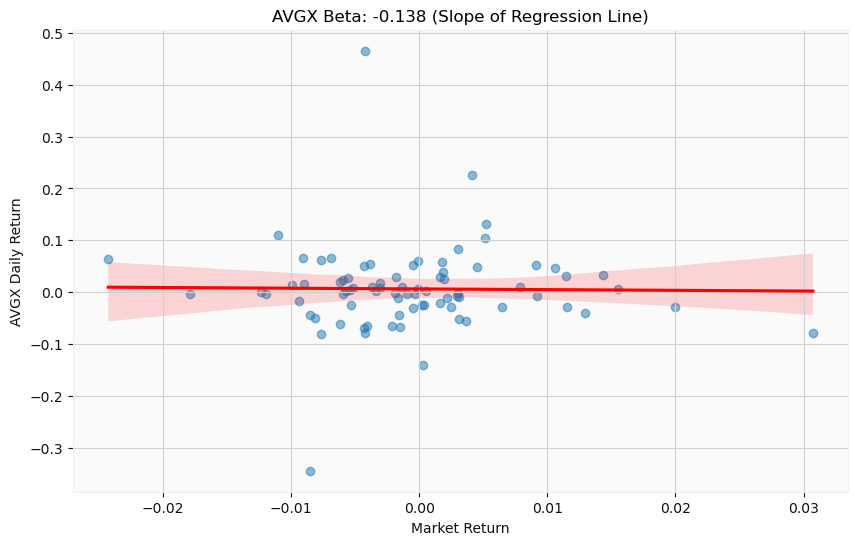

In [88]:
# Compute Beta
beta_value = avgx_merged_data[['Daily Return_', 'Market Return']].cov().iloc[0, 1] / avgx_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=avgx_merged_data['Market Return'], 
            y=avgx_merged_data['Daily Return_'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('AVGX Daily Return')
plt.title(f'AVGX Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

**NRO DF Cleaning**

In [89]:
# Flatten the multi-index column names if necessary
nro.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in nro.columns]

In [90]:
# Drop unnecessary index columns if they exist
# columns_to_drop = ['level_0', 'index']
# nro = nro.drop(columns=[col for col in columns_to_drop if col in nro.columns])

In [91]:
# Reset index to move Date into a regular column
nro.reset_index(inplace=True)

In [92]:
# Convert index to datetime format
nro.index = pd.to_datetime(nro.index)

In [93]:
# Filter to only keep rows where Date is within the desired range
nro = nro[nro['Date'] <= '2025-01-29']

In [94]:
nro

,Date,Close_NRO,High_NRO,Low_NRO,Open_NRO,Volume_NRO,Daily Return_
1970-01-01 00:00:00.000000000,2024-10-01,3.994841,4.004514,3.956150,4.004514,58800,NaN
1970-01-01 00:00:00.000000001,2024-10-02,3.965822,3.985168,3.946477,3.975495,110200,-0.007264
1970-01-01 00:00:00.000000002,2024-10-03,3.878768,3.985168,3.878768,3.965823,86300,-0.021951
1970-01-01 00:00:00.000000003,2024-10-04,3.830404,3.907786,3.782041,3.878768,234100,-0.012469
1970-01-01 00:00:00.000000004,2024-10-07,3.772368,3.820732,3.753022,3.820732,195500,-0.015151
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000077,2025-01-23,3.400000,3.460000,3.390000,3.400000,556400,-0.047619
1970-01-01 00:00:00.000000078,2025-01-24,3.400000,3.440000,3.400000,3.400000,351600,0.000000
1970-01-01 00:00:00.000000079,2025-01-27,3.360000,3.400000,3.360000,3.380000,287000,-0.011765
1970-01-01 00:00:00.000000080,2025-01-28,3.390000,3.420000,3.360000,3.390000,448300,0.008929


In [95]:
print(nro.columns)

Index(['Date', 'Close_NRO', 'High_NRO', 'Low_NRO', 'Open_NRO', 'Volume_NRO',
       'Daily Return_'],
      dtype='object')


In [96]:
print(nro.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


In [97]:
# Merge NRO with Market Index on Date
nro_merged_data = pd.merge(
    nro[['Date', 'Daily Return_']].copy(), 
    filtered_market_index_df[['Date', 'Market Return']].copy(),
    on='Date',
    how='inner'
)

In [98]:
# Rename columns for clarity
nro_merged_data.rename(columns={'Daily Return': 'NRO Daily Return'}, inplace=True)

In [99]:
# Display first few rows
print(nro_merged_data.head())

        Date  Daily Return_  Market Return
0 2024-10-01            NaN      -0.000422
1 2024-10-02      -0.007264       0.001832
2 2024-10-03      -0.021951      -0.009006
3 2024-10-04      -0.012469       0.009123
4 2024-10-07      -0.015151      -0.009369


In [100]:
# Compute covariance matrix
cov_matrix = nro_merged_data[['Daily Return_', 'Market Return']].cov()

# Extract covariance of AKRO vs. Market
cov_nro_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
nro_beta = cov_nro_market / var_market

In [101]:
# Print Beta value
print(f"NRO Beta: {nro_beta:.3f}")

NRO Beta: -0.018


In [102]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

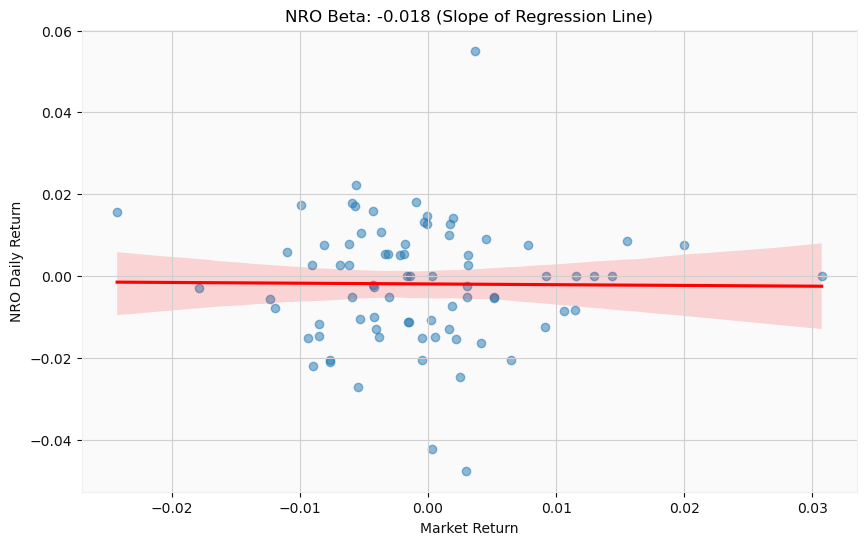

In [103]:
# Compute Beta
beta_value = nro_merged_data[['Daily Return_', 'Market Return']].cov().iloc[0, 1] / nro_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=nro_merged_data['Market Return'], 
            y=nro_merged_data['Daily Return_'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('NRO Daily Return')
plt.title(f'NRO Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# **1. Trend & Stability:**  
- **AVGX** exhibits a **strong upward momentum**, reflecting a sustained price increase throughout Q4, indicating **growth potential**.  
- **NRO** experienced a **gradual downtrend**, showing signs of **weakness and lack of bullish momentum** in the same period.  

# **2. Liquidity (Volume):**  
- **AVGX** maintains **higher trading volume**, ensuring **better liquidity** and more efficient trade execution.  
- **NRO** has **low and inconsistent volume**, which may lead to **higher slippage and difficulty in executing trades efficiently**.  

# **3. Volatility Comparison:**  
### **Standard Deviation of Returns:**  
- **AVGX** maintains a **moderate level of price fluctuation**, making it an **active trading opportunity** while still being **manageable**.  
- **NRO** is **too low in volatility**, which suggests **lower profit potential and limited movement for traders**.  

### **Rolling Volatility:**  
- **AVGX** shows **momentum-driven fluctuations**, making it **dynamic and favorable for traders** looking for opportunities.  
- **NRO** maintains **low volatility**, making it **less attractive for growth-seeking investors**.  

# **4. Beta (Market Correlation) Analysis:**  
- **AVGX Beta: -0.138** → **Mild negative correlation**, meaning **it still reacts to broader market trends while offering some diversification benefits**.  
- **NRO Beta: -0.018** → **Extremely weak correlation with the market**, indicating **lack of responsiveness to economic shifts**, reducing its ability to capitalize on market-wide gains.  

---

## **Final Verdict:**  
✅ **AVGX wins this round** based on **higher liquidity, stronger trend stability, and better market responsiveness**.  

While **NRO** offers **low volatility and stability**, its **lack of momentum and liquidity make it less attractive for investment compared to AVGX**, which **demonstrates higher potential for growth and market participation**.

---

🏆 **Overall Winner: AVGX** 🎉  

After evaluating **AVGX vs. NRO** across key financial metrics, here’s the final verdict based on the **main decision factors**:

| **Metric** | **AVGX ✅** | **NRO ❌** | **Winner 🏆** |
|------------|-------------|-------------|---------------|
| **Stability** | More stable trend with periodic surges | Declining price movement | **AVGX** |
| **Trend Consistency** | Recovered from dips with strong uptrend | Sustained downward pressure | **AVGX** |
| **Liquidity** | Higher trading volume, easier execution | Lower liquidity, risk of slippage | **AVGX** |
| **Volatility** | Moderate fluctuations, controlled risk | Lower volatility but lacking movement | **AVGX** |
| **Rolling Volatility** | Managed increases in volatility with momentum | Flat movement, limited trading activity | **AVGX** |
| **Market Correlation (Beta)** | Less inverse correlation (-0.138) | More stable (-0.018) | **NRO** |

---

### **Final Decision:**  
✅ **AVGX wins overall.**  

NRO only outperformed in **beta (market correlation)**, but this alone does not outweigh **AVGX's stronger stability, trend consistency, liquidity, and momentum-driven growth.**  

---

🏆 **AVGX moves to the FINAL ROUND of StockBowl!**  